In [1]:
import numpy as np
#load data from file导入txt数据
def load_data(filename):
    dataset = []
    label = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        dataset.append(lineArr[0:3])
        label.append(lineArr[-1])    
    return np.array(dataset,dtype=np.float64),\
           np.array(label,dtype=np.int)




(1000L, 3L) (1000L,)
[  4.09200000e+04   8.32697600e+00   9.53952000e-01] [3 2 1 1 1 1 3 3 1 3]


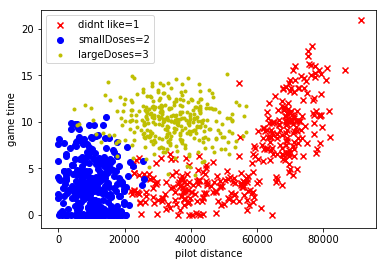

In [2]:
import matplotlib.pyplot as plt
#导入数据并且可视化一下
data,label = load_data("k-Nearest Neighbor/datingTestSet2.txt")
print data.shape,label.shape
print data[0],label[0:10]

def plot(x,y):
    label1 = np.where(y.ravel() == 1)
    plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = 'didnt like=1')
    label2 = np.where(y.ravel() == 2)
    plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = 'smallDoses=2')
    label3 = np.where(y.ravel() == 3)
    plt.scatter(x[label3,0],x[label3,1],marker='.',color = 'y',label = 'largeDoses=3')
    plt.xlabel('pilot distance')
    plt.ylabel('game time')
    plt.legend(loc = 'upper left')
    plt.show()
    
plot(data,label)  

In [3]:
#因为特征数据的范围不一样，所以需要归一化
#公式:newvalue = (oldvalue - min) / (max - min)
#将数据变成0-1之间，而不是0中心化

def normalFeature(x):
    x_min = np.min(x,axis = 0)
    x_max = np.max(x,axis = 0)
    x_new = (x - x_min) / (x_max - x_min)
    
    return x_new,x_min,x_max

x_new,x_min,x_max = normalFeature(data)

print x_new.shape
print x_new[0]
print x_min
    

(1000L, 3L)
[ 0.44832535  0.39805139  0.56233353]
[ 0.        0.        0.001156]


In [4]:
#knn算法类的实现
class KNearestNeighbor(object):
    '''
    knn classifier with L2 distance
    '''

    def __init__(self):
        pass

    # 输入训练数据集
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # 预测测试数据的分类结果
    def predict(self, X_test,y_test, k=1,display = True):
        dist = self.distance(X_test)
        num_test = X_test.shape[0]
        y_pred = np.zeros(num_test)
        for i in xrange(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dist[i])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
            #每过10次输出一次测试结果
            if (i % 10 ==0) & display:
                print "prediction is %d,the real is %d"%(y_pred[i],y_test[i])
        return y_pred

    # 将测试数据按照特征值与训练数据进行L2距离计算
    def distance(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]

        dist = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist[i] = np.sqrt(np.sum(np.square(self.X_train - X_test[i]), axis=1))
        return dist

In [5]:
#划分训练和测试集合
rate = 0.1 #划分的概率
m = data.shape[0]
m_test = int(m * rate)
x_train = x_new[m_test:m,:]
y_train = label[m_test:m]
x_test = x_new[0:m_test,:]
y_test = label[0:m_test]

print x_train.shape,x_test.shape
print y_train.shape,y_test.shape

(900L, 3L) (100L, 3L)
(900L,) (100L,)


In [6]:
#训练测试一下
classify = KNearestNeighbor()
classify.train(x_train,y_train)
y_test_pred = classify.predict(x_test,y_test,k=3)
#输出测试准确率
acc = np.mean(y_test == y_test_pred)
print "the test accuracy is ",acc



prediction is 3,the real is 3
prediction is 1,the real is 1
prediction is 2,the real is 2
prediction is 3,the real is 3
prediction is 1,the real is 1
prediction is 2,the real is 2
prediction is 1,the real is 1
prediction is 2,the real is 2
prediction is 1,the real is 1
prediction is 3,the real is 3
the test accuracy is  0.95


In [7]:
result = ["didnt like","small dose","large dose"]
input = np.array([[10000,10,0.5]])
#一定记得使用train_set的min和max把数据normal!!
input_new = (input-x_min) / (x_max - x_min)
pred = classify.predict(input_new,y_test,k=3,display=False)
print pred
print "you will probablly like this person:",result[int(pred[0])-1]




[ 2.]
you will probablly like this person: small dose
